# 決定木によるアヤメの分類

In [2]:
#! pip install pydotplus
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.pyplot as plt

In [3]:
# Iris データの読込と表示
# 変数:4、サンプル数:150、種類:3
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# Irisデータを表示
iris_view = sns.load_dataset('iris')
iris_view

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# 入力変数と説明変数の切り分け
X = iris.data  
Y = iris.target

In [6]:
# 決定木による分類の実行
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

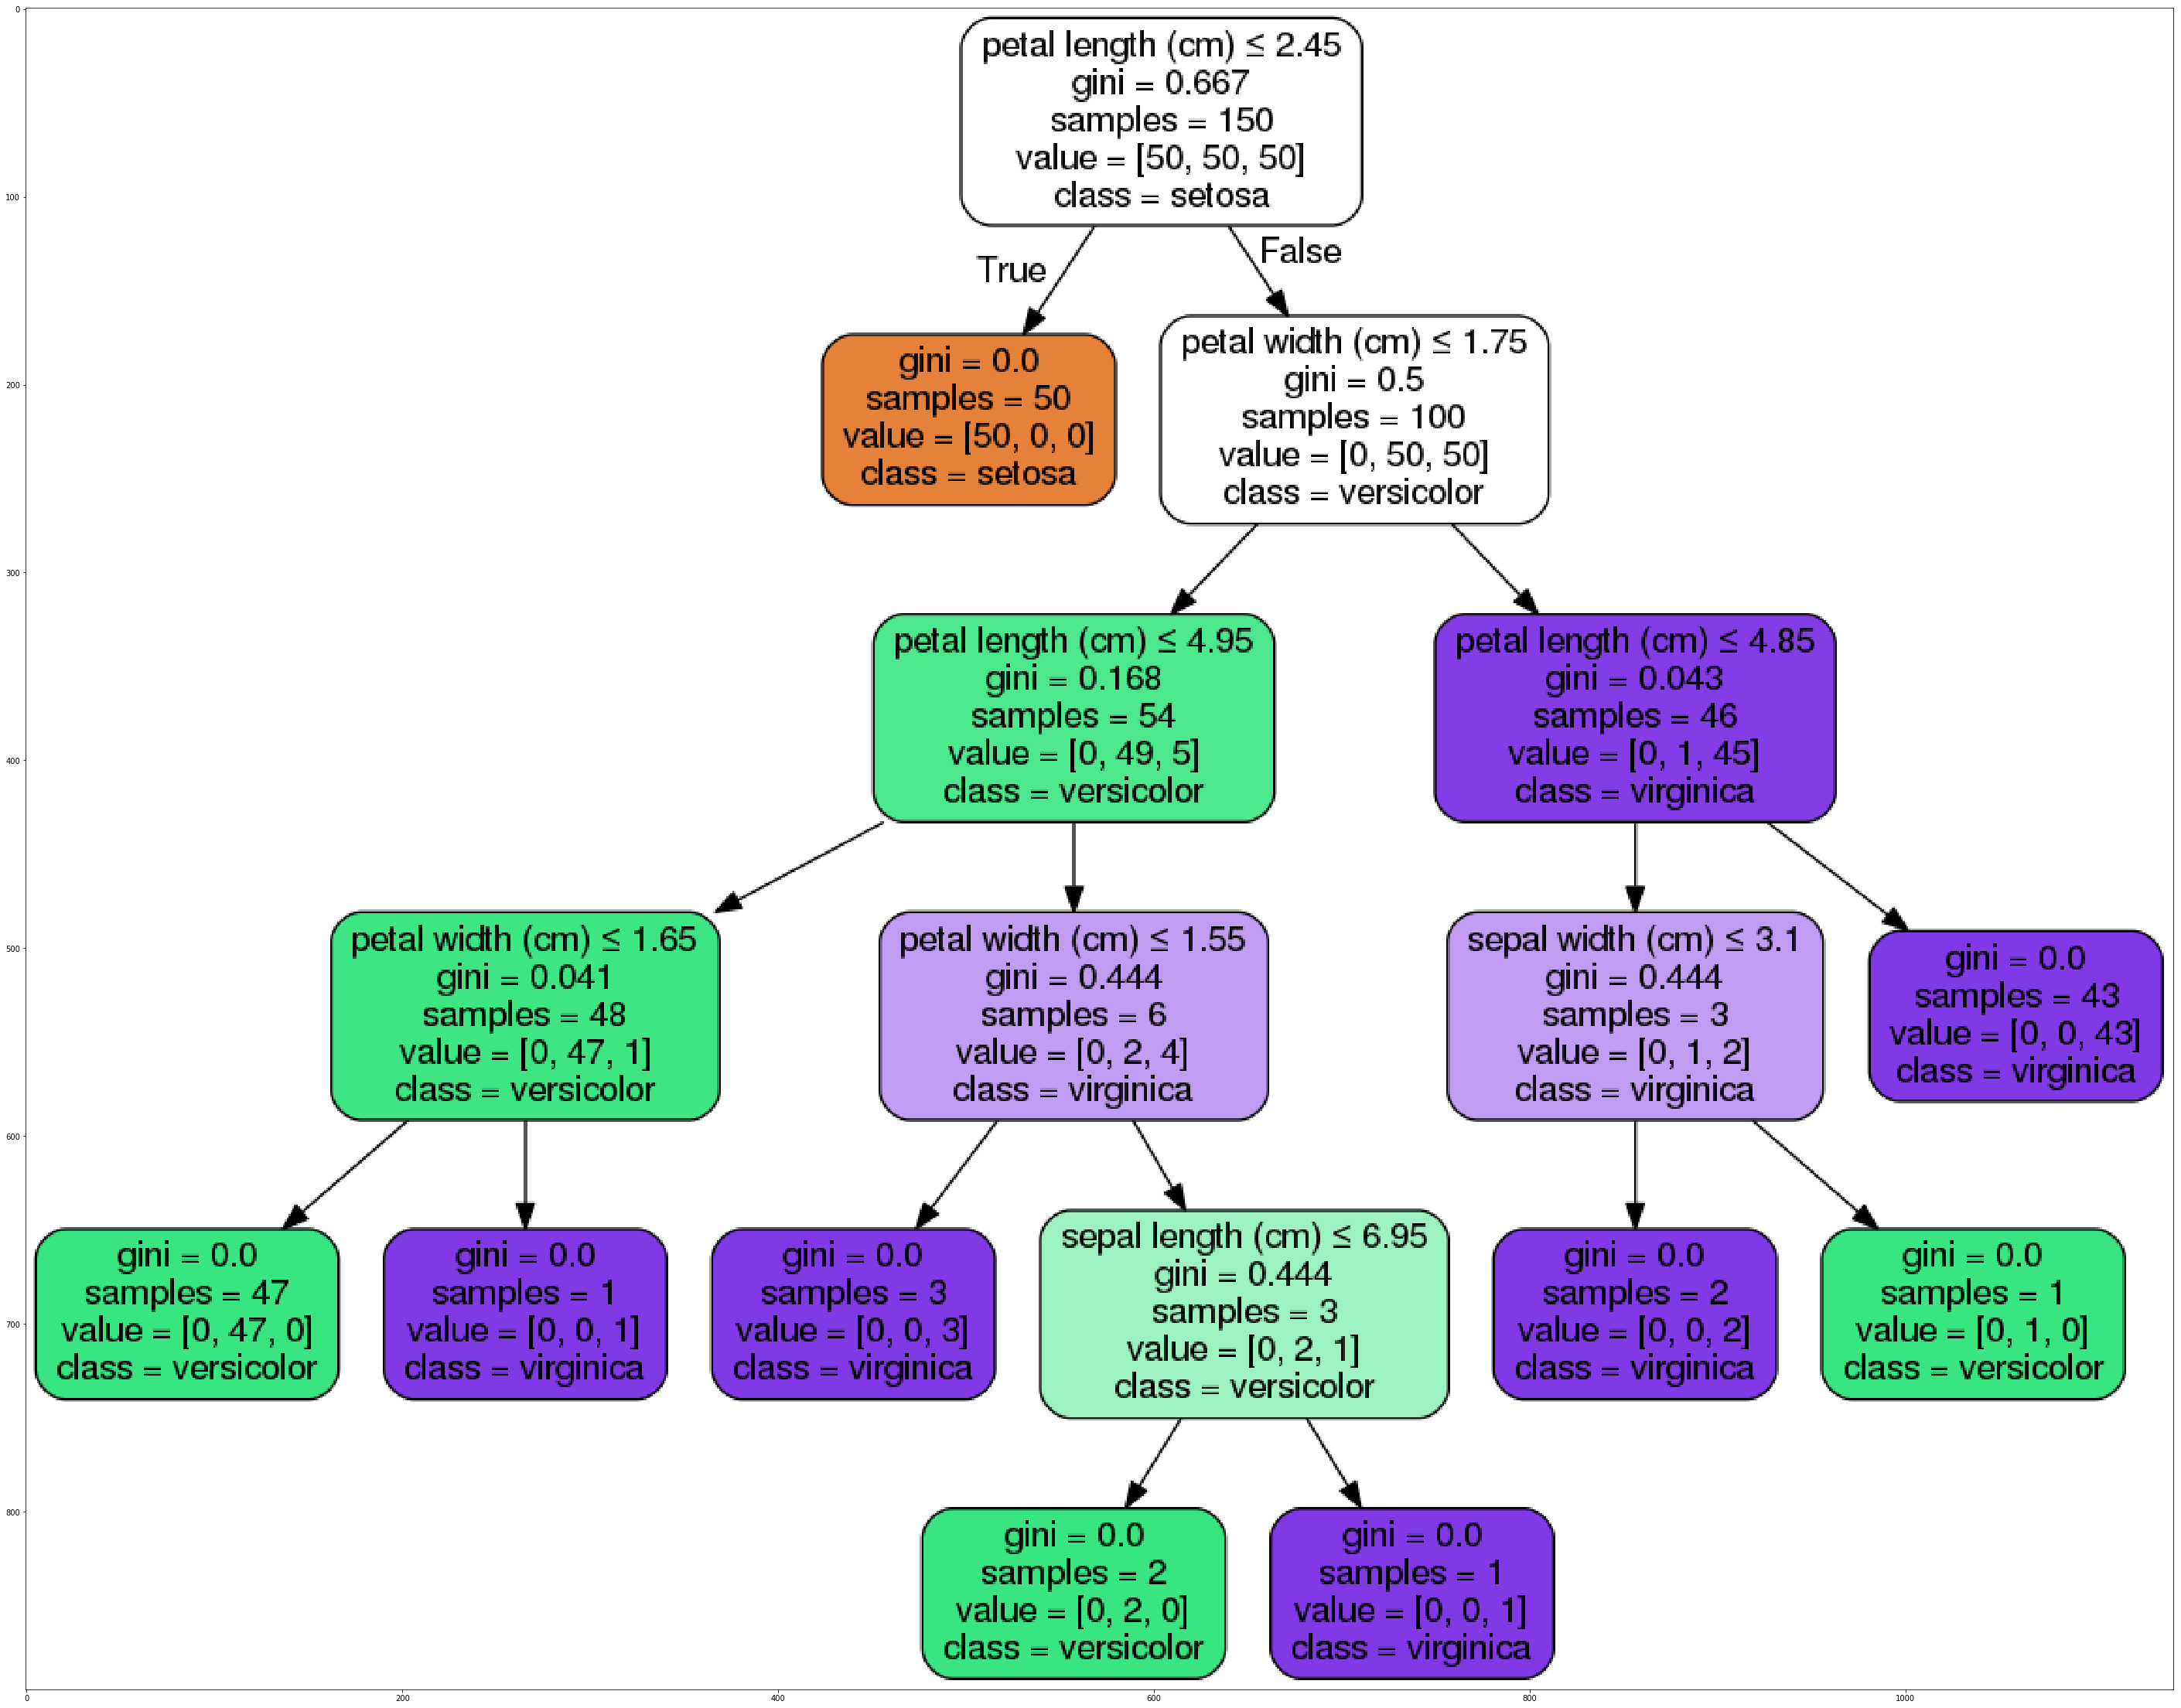

In [7]:
# 決定木の可視化
outputfile = "dicisiontree_iris.png"
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png(outputfile) 
img = plt.imread(outputfile)
plt.figure(figsize=(80,40))
plt.imshow(img)
plt.show() 

In [ ]:
# 各要素の重要度(影響力の高いもの)を表示 [sepal_length, sepal_width, petal_length, petal_width]
clf.feature_importances_ 

In [ ]:
# 予測精度の確認
clf.score(X,Y)

In [ ]:
# 元データの150件目(X[149])で各クラスごとの分類確率を表示([Setosa,Versicolor, Virginica])
print (clf.predict_proba([X[149]]))

In [ ]:
# 元データの150件目(X[149])で分類結果を表示(0=Setosa,1=Versicolor, 2=Virginica)
print (clf.predict([X[149]]))

In [ ]:
# 元データの150件目(Y[149])の正解を表示(0=Setosa,1=Versicolor, 2=Virginica)
print ([Y[149]])

In [ ]:
# 参考: 手動で値設定する方法
print (clf.predict([[5.1, 3.5, 1.4, 0.2]]))
print (clf.predict_proba([[5.1, 3.5, 1.4, 0.2]]))